<br>

# AI Domain: Convolutional Neural Network (CNN)
## CNN Project 01: Face Recognition using LFW DataSet.

| Prepared by | Rayyan Ahmed |
|-------------|--------------|
| Date | 20-21th March, 2025

<br>

### Libraries Used:
- Numpy
- Pandas
- Matplotlib
- Scikit-Learn
- Tensorflow
- Keras
- Streamlit (Model Deployment in other app.py)
- Pillow

<br>

# Loading dataFrame

<br>

In [1]:
import numpy as np
from sklearn.datasets import fetch_lfw_people

In [2]:
df = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
df

{'data': array([[0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533,
         0.3803922 ],
        [0.14771242, 0.19738562, 0.1751634 , ..., 0.45751634, 0.44444445,
         0.53594774],
        [0.34379086, 0.39477125, 0.49150327, ..., 0.709804  , 0.72156864,
         0.7163399 ],
        ...,
        [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19738562, 0.22091503,
         0.19346406],
        [0.19346406, 0.24705882, 0.34248367, ..., 0.7346406 , 0.6640523 ,
         0.6117647 ],
        [0.11633987, 0.10196079, 0.1267974 , ..., 0.13333334, 0.13725491,
         0.2535948 ]], dtype=float32),
 'images': array([[[0.9973857 , 0.99607843, 0.9921568 , ..., 0.29803923,
          0.24836601, 0.20653595],
         [0.9973857 , 0.9921569 , 0.9908497 , ..., 0.30588236,
          0.2535948 , 0.21568628],
         [0.96078426, 0.93071896, 0.8679738 , ..., 0.2875817 ,
          0.24183007, 0.21568628],
         ...,
         [0.34509805, 0.26143792, 0.17385621, ..., 0.4248366 ,
     

<br>

# DataSet SHape

<br>

In [3]:
df.data.shape, df.images.shape, df.target.shape, df.target_names.shape

((1288, 1850), (1288, 50, 37), (1288,), (7,))

#### Each row in the data array corresponds to one image, and each value in that row represents a pixel's intensity (normalized between 0 and 1).
#### Since the shape is (1288, 1850):
- 1288 → Total number of images.
- 1850 → Number of pixel values per image (which means each image has 1850 pixels).
#### Example:
- Look at the first row of data: [0.9973857 , 0.99607843, 0.9921568 , ..., 0.38169935, 0.38823533, 0.3803922 ] which is representing 1st image of dataset.
- Here, the values "0.9973857, 0.99607843... 0.3803922" are representing the pixels of 1st image.
- i.e: 1st pixel is 99.73857% gray, 2nd is 99.607843% gray and last pixel is 38.03922% gray.

---

#### Each double bracket [[ ... ]] represents a single image, which is a 2D matrix (height × width).
#### From the shape (1288, 50, 37), we can see that:
- Each image has 50 rows (height).
- Each row has 37 values (width, i.e., columns).
- Each double bracket [[ ... ]] contains 50 rows, where each row has 37 values.

<br>

# Getting Image Pixels of Target Label 1:

<br>

In [4]:
images_label_i = df.images[df.target == 1]
print(images_label_i)

[[[0.04705882 0.01699346 0.02352941 ... 0.02745098 0.02352941 0.02222222]
  [0.2771242  0.13202615 0.03529412 ... 0.02745098 0.02222222 0.02222222]
  [0.50849676 0.3882353  0.21960784 ... 0.03006536 0.02091503 0.01437909]
  ...
  [0.43529412 0.39607844 0.3267974  ... 0.1006536  0.19215687 0.25490198]
  [0.33333334 0.3019608  0.27189544 ... 0.07189543 0.16078432 0.21960784]
  [0.26666668 0.23660131 0.22352941 ... 0.06535948 0.14248367 0.20130719]]

 [[0.24705882 0.28627452 0.30718955 ... 0.7660131  0.66013074 0.5163399 ]
  [0.27320263 0.2901961  0.30588236 ... 0.76732033 0.69673204 0.5267974 ]
  [0.28235295 0.29542485 0.32026145 ... 0.73071903 0.7320261  0.5764706 ]
  ...
  [0.20261438 0.530719   0.6653595  ... 0.27450982 0.38431373 0.43398693]
  [0.07320262 0.33071896 0.6366013  ... 0.22222222 0.4013072  0.45098042]
  [0.0496732  0.14771242 0.5294118  ... 0.20261438 0.30588236 0.43398693]]

 [[0.45751634 0.44313726 0.47843137 ... 0.09411765 0.05490196 0.0496732 ]
  [0.5045752  0.503268

<br>

# Plotting Images for Target Names

<br>

In [5]:
import matplotlib.pyplot as plt

Label: 0, Name: Ariel Sharon
Label: 1, Name: Colin Powell
Label: 2, Name: Donald Rumsfeld
Label: 3, Name: George W Bush
Label: 4, Name: Gerhard Schroeder
Label: 5, Name: Hugo Chavez
Label: 6, Name: Tony Blair

Enter label for name: 3
Enter number of images: 4

Showing image 1 of George W Bush


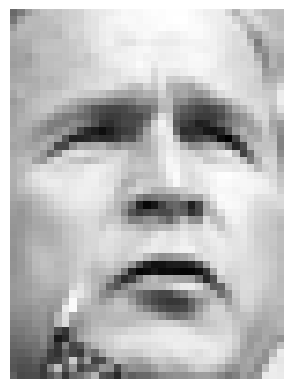


Showing image 2 of George W Bush


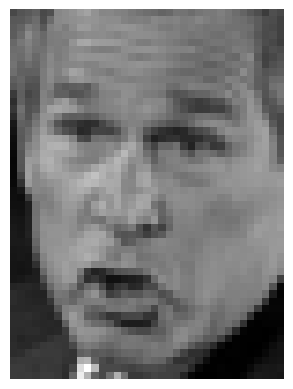


Showing image 3 of George W Bush


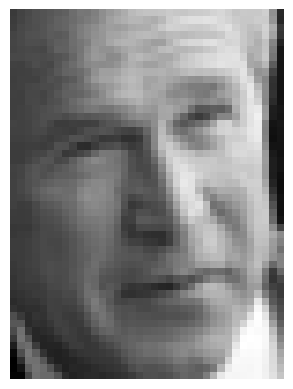


Showing image 4 of George W Bush


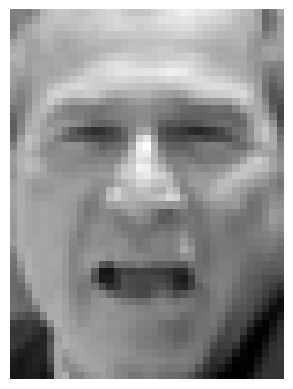

In [6]:
for label, name in enumerate(df.target_names):
    print(f"Label: {label}, Name: {name}")

ask = input("\nEnter label for name: ")
num = int(input("Enter number of images: "))

image_label = df.images[df.target == int(ask)]

for i in range(min(len(image_label), num)):
    print(f"\nShowing image {i+1} of {df.target_names[int(ask)]}")
    plt.imshow(image_label[i], cmap='gray')
    plt.axis('off')
    plt.show()

<br>

# Accessing Single Image

<br>

In [52]:
name_index = {'Ariel Sharon' : 0, 'Colin Powell' : 1, 'Donald Rumsfeld' : 2, 'George W Bush' : 3,'Gerhard Schroeder' : 4, 'Hugo Chavez' : 5, 'Tony Blair' : 6}
name_index['Ariel Sharon']

0

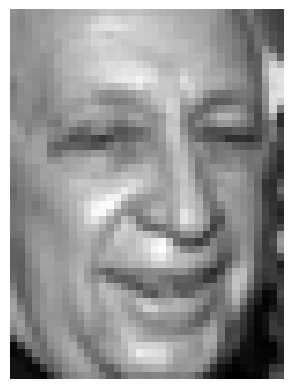

In [59]:
image = df.data[4].reshape((50, 37))

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

<br>

# Seperating x & y axis

<br>

In [8]:
x, y = df.images, df.target

In [9]:
target_names = df.target_names

In [10]:
print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (1288, 50, 37), y shape: (1288,)


In [11]:
x.shape, y.shape

((1288, 50, 37), (1288,))

<br>

# Reshaping x for CNN Ease

<br>

In [13]:
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)

<br>

# One-hot Encoding of y

<br>

In [14]:
from tensorflow.keras.utils import to_categorical

In [16]:
cat_y = to_categorical(y)
cat_y, cat_y[0], len(cat_y[0])

(array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 7)

<br>

# Train Test Split

<br>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, cat_y, test_size = 0.2, random_state = 42)

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1030, 50, 37, 1), (258, 50, 37, 1), (1030, 7), (258, 7))

<br>

# Building Sequential Layers

<br>

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50, 37, 1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    #Dropout(0.5),
    Dense(len(target_names), activation='softmax')  # Output layer
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 48, 35, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 22, 15, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 11, 7, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4928)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         630,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 650,631 (2.48 MB)

 Trainable params: 650,631 (2.48 MB)

 Non-trainable params: 0 (0.00 B)

<br>

# Fitting Model

<br>

In [23]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data = (x_test, y_test))
history

Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.3914 - loss: 1.7641 - val_accuracy: 0.4612 - val_loss: 1.6009
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.4056 - loss: 1.6784 - val_accuracy: 0.4612 - val_loss: 1.5249
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4455 - loss: 1.5373 - val_accuracy: 0.5775 - val_loss: 1.2884
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5680 - loss: 1.2530 - val_accuracy: 0.6550 - val_loss: 0.9933
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.6696 - loss: 0.9314 - val_accuracy: 0.7636 - val_loss: 0.7588
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8077 - loss: 0.6209 - val_accuracy: 0.7907 - val_loss: 0.6163
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.8584 - loss: 0.4709 - val_accuracy: 0.8295 - val_loss: 0.5486
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.8718 - loss: 0.3954 - val_accuracy: 0.8023 - v

In [24]:
history.history

{'accuracy': [0.4000000059604645,
  0.4019417464733124,
  0.462135910987854,
  0.5961164832115173,
  0.6951456069946289,
  0.7941747307777405,
  0.8592233061790466,
  0.8834951519966125,
  0.8999999761581421,
  0.9184466004371643,
  0.9252427220344543,
  0.9543689489364624,
  0.9699029326438904,
  0.9718446731567383,
  0.9718446731567383,
  0.984466016292572,
  0.9893203973770142,
  0.99320387840271,
  0.9970873594284058,
  0.9990290999412537],
 'loss': [1.7328122854232788,
  1.6711945533752441,
  1.5108486413955688,
  1.1773823499679565,
  0.8883866667747498,
  0.6222968101501465,
  0.4522271454334259,
  0.38983896374702454,
  0.31743311882019043,
  0.2556907832622528,
  0.23495446145534515,
  0.16971325874328613,
  0.11816030740737915,
  0.11841051280498505,
  0.11723454296588898,
  0.07718819379806519,
  0.0546124204993248,
  0.04466131702065468,
  0.02843155339360237,
  0.02059854567050934],
 'val_accuracy': [0.46124032139778137,
  0.46124032139778137,
  0.5775193572044373,
  0.655

<br>

# Model Accuracy

<br>

In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.3f} %")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8962 - loss: 0.4723
Test Accuracy: 90.310 %


<br>

# Classification Report

<br>

In [34]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(x_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names = target_names)
print(report)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
                   precision    recall  f1-score   support

     Ariel Sharon       0.77      0.91      0.83        11
     Colin Powell       0.91      0.91      0.91        47
  Donald Rumsfeld       0.82      0.82      0.82        22
    George W Bush       0.97      0.95      0.96       119
Gerhard Schroeder       0.78      0.95      0.86        19
      Hugo Chavez       0.80      0.62      0.70        13
       Tony Blair       0.85      0.85      0.85        27

         accuracy                           0.90       258
        macro avg       0.84      0.86      0.85       258
     weighted avg       0.91      0.90      0.90       258



In [38]:
model.predict(x_test)[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([1.9872509e-08, 3.2246181e-08, 9.5230171e-06, 9.9952346e-01,
       1.5828283e-08, 9.4222196e-06, 4.5758832e-04], dtype=float32)

In [39]:
np.argmax(model.predict(x_test), axis = 1)[0]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


np.int64(3)

<br>

# Image Name Predictor

<br>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


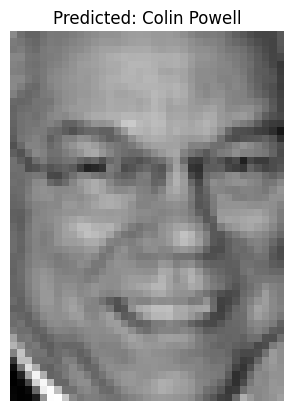

In [27]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_face_from_dataset(index):
    img = x_test[index]

    img_expanded = np.expand_dims(img, axis=0)

    prediction = model.predict(img_expanded)
    predicted_class = np.argmax(prediction)
    predicted_name = target_names[predicted_class]

    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Predicted: {predicted_name}")
    plt.axis("off")
    plt.show()

predict_face_from_dataset(7)

<br>

# Model Saving

<br>

In [40]:
saved_model = model.save("lfw_prone.keras")

<br>

# Downloading Saved Model

<br>

In [42]:
from google.colab import files
files.download("lfw_prone.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>